In [1]:
from helpers import *
import matplotlib.pyplot as plt

/Users/wlan/miniforge3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_x, train_y, test_x, test_y = init_data("train.csv", 0.7)
train_y_mean, test_y_mean = train_y.median().item(), test_y.median().item() # Average or median?
train_y_mean, test_y_mean

(-0.21929313242435455, -0.23817472159862518)

In [3]:
num_data, input_size = train_x.shape
outputs_size = 1
hidden_size = 1
num_data, input_size

(1021, 305)

In [4]:
w = torch.rand(input_size)
b = torch.rand(1)

In [5]:
lr = 0.001
tot_loss = []
with torch.no_grad():
    for _ in range(500):
        correct = 0
        for x, y in zip(train_x, train_y):
            label = 1 if y > train_y_mean else 0
            y_pred = x.dot(w) + b
            # print(label, y_pred)
            label_pred = 1 if y_pred > train_y_mean else 0
            w += lr * (label - label_pred) * x
            b += lr * (label - label_pred)
            if label == label_pred: correct += 1
        loss = 1 - correct / len(train_y)
        print(_, loss)
        tot_loss.append(loss)

0 0.28893241919686585
1 0.20372184133202742
2 0.15768854064642512
3 0.128305582761998
4 0.11753183153770808
5 0.10577864838393736
6 0.10186092066601371
7 0.09108716944172379
8 0.08619000979431934
9 0.08325171400587661
10 0.07541625857002943
11 0.07541625857002943
12 0.06953966699314396
13 0.07149853085210578
14 0.06464250734573951
15 0.05876591576885404
16 0.06562193927522042
17 0.06072477962781586
18 0.05876591576885404
19 0.050930460333006855
20 0.05386875612144959
21 0.050930460333006855
22 0.050930460333006855
23 0.044074436826640584
24 0.045053868756121496
25 0.04309500489715967
26 0.039177277179236025
27 0.04015670910871694
28 0.044074436826640584
29 0.039177277179236025
30 0.04113614103819785
31 0.0372184133202742
32 0.039177277179236025
33 0.03525954946131249
34 0.03428011753183158
35 0.032321253672869754
36 0.03134182174338884
37 0.03525954946131249
38 0.028403525954946107
39 0.03525954946131249
40 0.032321253672869754
41 0.03623898139079329
42 0.03428011753183158
43 0.0235063

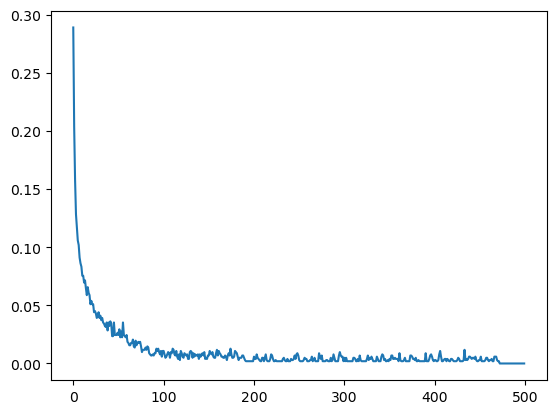

In [6]:
plt.plot(tot_loss, label="Train loss")
plt.show()

In [7]:
with torch.no_grad():
    pred = test_x.matmul(w) + b
    labels_pred = pred > train_y_mean
    labels_gt = test_y > train_y_mean
    acc = (labels_pred == labels_gt).count_nonzero().item() / len(test_y)
    print("Accuracy", acc)

Accuracy 0.9043280182232346
